**Question 1.** 

Le problème a été traité en PC2 exercice 1 : on définit 
$\mathbb{T} = 
\begin{pmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots & \vdots \\
1 & t_n 
\end{pmatrix} $

Si on note alors $ \hat{\beta} =
\begin{pmatrix}
\hat{\beta}_1 \\
\hat{\beta}_2 
\end{pmatrix}$
, on a montré en calculant le gradient de $S$ que $\hat{\beta} = (\mathbb{T}^T\mathbb{T})^{-1}\mathbb{T}^{T}X$. 
Ce qui permet bien d'aboutir aux formules données par l'énoncé.

 

**Question 2.** 

On sait que $\frac{\hat{\beta}_{j}-\hat{\beta}_j}{\hat{\sigma}_j}$ suit une loi de Student à $n-2$ degrés de liberté. 
Donc $\mathbb{P}_{\theta}(-t_{n-2}(1-\frac{\alpha}{2})<=\frac{\hat{\beta}_{j}-\beta_j}{\hat{\sigma}_j}<=t_{n-2}(1-\frac{\alpha}{2})) = 1-\alpha$. 

D'où l'on déduit immédiatement que : 
$\mathbb{P}_{\theta}(\beta_{j} \in [\hat{\beta}_j - t_{n-2}(1-\frac{\alpha}{2}), \hat{\beta}_j + t_{n-2}(1-\frac{\alpha}{2})]) = 1-\alpha$
$\\$
Cela signifie que, admettant que les données recueillies suivent effectivement une loi correspondant au modèle choisi, la valeur du paramètre inconnu $\beta_j$ se trouve dans l'intervalle considéré avec un niveau de confiance de $1-\alpha$.

**Question 3.** 

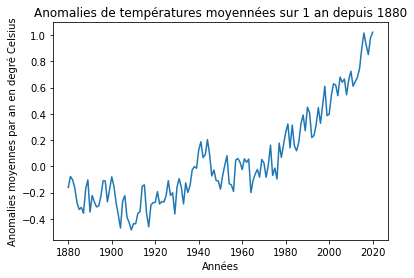

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

#Exploitation des données

a = open("/Users/terny/Downloads/GLB.Ts+dSST.csv","r+")
count=0
tab=[]
s=[]
for ligne in a :
    if 142>=count>=2 :    #on ne prend pas en compte l'année 2021 car il manque plusieurs mois 
        s = ligne.split(",")
        for i in range(13) :
            s[i] = float(s[i])
        tab.append(s[0:13])
    count+=1
données  = np.array(tab)


#Visualisation des données

axeX = []     #liste des dates
axeY = []     #liste des moyennes des anomalies sur 1 an
n,p=np.shape(données)

for j in range(n) : 
    axeX.append(données[j][0])
    axeY.append(données[j][1:13].sum()/12)
plt.plot(axeX,axeY,label="Evolution de température")
plt.title("Anomalies de températures moyennées sur 1 an depuis 1880")
plt.xlabel("Années")
plt.ylabel("Anomalies moyennes par an en degré Celsius")
plt.show()

**Questions 4 et 5.** 

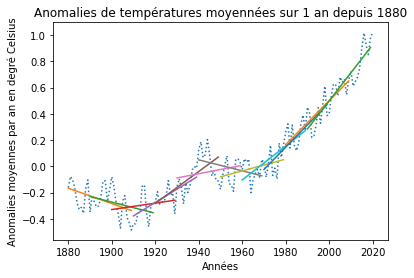

In [2]:
plt.plot(axeX,axeY,label="Evolution de température",linestyle=':')
plt.title("Anomalies de températures moyennées sur 1 an depuis 1880")
plt.xlabel("Années")
plt.ylabel("Anomalies moyennes par an en degré Celsius")


intervalles = [[] for j in range(12)]   #liste contenant les estimateurs [B1,B2,sigma2] pour les différents intervalles de temps

for j in range(12) : 
    B2=0
    s=0          #somme des (t_i-t)**2
    x=0
    t=(30*(1880+j*10)+15*29)/30      #valeur de la moyenne des années sur l'intervalle de 30 ans
    for i in range(10*j,10*j+30) :
        B2+=(axeX[i]-t)*axeY[i]
        s+=(axeX[i]-t)**2
        x+=axeY[i]
    B2=B2/s
    intervalles[j] = [x/30-B2*t,B2]


for j in range(12) :
    B1,B2 = intervalles[j]
    sigma2=0
    for i in range(10*j,10*j+30) :
        sigma2 += (axeY[i]-B1-B2*axeX[i])**2
    intervalles[j].append(sigma2/(30-2))
    plt.plot([1880+j*10,1880+j*10+29],[B1+(1880+j*10)*B2,B1+(1880+j*10+29)*B2])     #affichage des droites de régression
plt.show()

**Question 6.** 


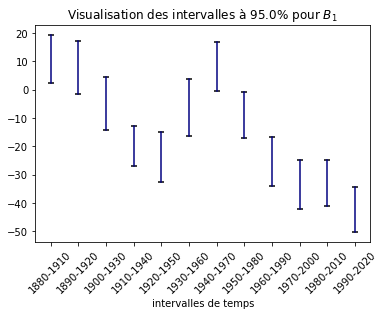

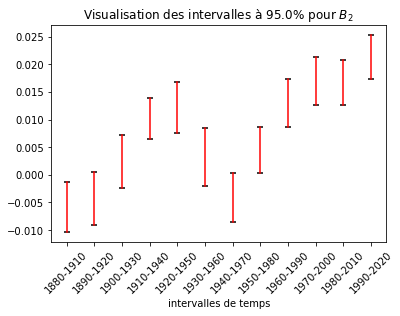

In [3]:
#Visualisation des intervalles question 6.
    
alpha = 0.05
quantile = stats.t.ppf(1-alpha/2,df=28)      #pour un intervalle de niveau alpha

B1_bas=[0 for j in range(12) ]
B1_haut=[0 for j in range(12) ]
B2_bas=[0 for j in range(12) ]
B2_haut=[0 for j in range(12) ]

for j in range(12) : 
    s=0                          #somme des (t_i-t)**2   
    p=0                          #somme des (t_i)**2 
    t=(30*(1880+j*10)+15*29)/30
    for i in range(10*j,10*j+30) :
        p+=axeX[i]**2
        s+=(axeX[i]-t)**2
    B1,B2,sigma2 = intervalles[j]
    B1_bas[j] = B1-quantile*(sigma2*p/(30*s))**0.5            #valeur basse pour B1 dans l'intervalle 
    B1_haut[j] = B1+quantile*(sigma2*p/(30*s))**0.5           #valeur haute pour B1 dans l'intervalle 
    B2_bas[j] = B2-quantile*(sigma2/s)**0.5
    B2_haut[j] = B2+quantile*(sigma2/s)**0.5

    
plt.figure(1) 
x = ["1880-1910","1890-1920","1900-1930","1910-1940","1920-1950","1930-1960","1940-1970","1950-1980","1960-1990","1970-2000","1980-2010","1990-2020"]
plt.xticks(range(12), x,rotation=45)
plt.scatter(x,B1_bas,marker='_',color='k')
plt.scatter(x,B1_haut,marker='_',color='k')

for j in range(12) :
    plt.plot([j,j],[B1_bas[j],B1_haut[j]],color='navy')
    
plt.xlabel("intervalles de temps")
plt.title("Visualisation des intervalles à " + str((1-alpha)*100) + "% pour $B_1$")

plt.figure(2) 
x = ["1880-1910","1890-1920","1900-1930","1910-1940","1920-1950","1930-1960","1940-1970","1950-1980","1960-1990","1970-2000","1980-2010","1990-2020"]
plt.xticks(range(12), x,rotation=45)

plt.scatter(x,B2_bas,marker='_',color='k')
plt.scatter(x,B2_haut,marker='_',color='k')

for j in range(12) :
    plt.plot([j,j],[B2_bas[j],B2_haut[j]],color='red')
    
plt.xlabel("intervalles de temps")
plt.title("Visualisation des intervalles à " + str((1-alpha)*100) + "% pour $B_2$")
    
plt.show()

**Question 7.** 

Le graphique en réponse à la question 5 montre que la régression linéaire rend relativement bien compte des variations de la température sur un intervalle de 30 ans, particulièrement depuis les années 80. 
Néanmoins le modèle choisit, à savoir que les températures suivent des gaussiennes dont les moyennes varient linéairement avec le temps, est **mauvais sur les grandes échelles de temps**. En effet, on obtient des intervalles pour $B_1$, comme pour $B_2$, **disjoints** (et parfois très éloignés les uns des autres) pour des intervalles de temps différents. Autrement dit, il n'y a pas de valeur du couple ($B_1$,$B_2$) qui permette de rendre compte des variations des températures sur de longues périodes. 